In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
    |||||   ||||||||||||||||| SIMEPAR
    |||||   ||||||||||||||||| Sistema Meteorológico do Paraná
    |||||               |||||
    |||||||||||||||||   ||||| Technology and Environmental Information
    (C) Copyleft Sistema Meteorológico Simepar (SIMEPAR)
        http://www.simepar.br

    Author: Paulo Alexandre da Silva Mello (paulo.mello.simepar@gmail.com)
    =============================
    PLOT_BSCAN_MAP
    =============================

"""
def _check_sweep_in_range(sweep, radar):
    """ Check that a sweep number is in range. """
    if sweep < 0 or sweep >= radar.nsweeps:
        raise IndexError('Sweep out of range: ', sweep)
    return

def get_start(sweep, radar):
    """ Return the starting ray index for a given sweep.  """
    _check_sweep_in_range(sweep, radar)
    return radar.sweep_start_ray_index['data'][sweep]

def get_end(sweep, radar):
    """ Return the ending ray for a given sweep. """
    _check_sweep_in_range(sweep, radar)
    return radar.sweep_end_ray_index['data'][sweep]

def get_start_end(sweep, radar):
    """ Return the starting and ending ray for a given sweep. """
    return get_start(sweep, radar), get_end(sweep, radar)
def get_slice(sweep, radar):
    """ Return a slice for selecting rays for a given sweep. """
    start, end = get_start_end(sweep, radar)
    return slice(start, end+1)

def get_azimuth(sweep, radar,  copy=False):
    """
    Return an array of azimuth angles for a given sweep.
    Parameters
    ----------
    sweep : int
        Sweep number to retrieve data for, 0 based.
    copy : bool, optional
        True to return a copy of the azimuths. False, the default, returns
        a view of the azimuths (when possible), changing this data will
        change the data in the underlying Radar object.
    Returns
    -------
    azimuths : array
        Array containing the azimuth angles for a given sweep.
    """
    s = get_slice(sweep, radar)
    azimuths = radar.azimuth['data'][s]
    if copy:
        return azimuths.copy()
    else:
        return azimuths

def __getData(field,radar,sweep):
    """
    Return an array of azimuth angles, radar field and range of Radar for a given sweep.
    Parameters
    ----------
    field : string 
        with the variable name from Radar
    radar : Radar-object 
        Pyart data structure to a radar 
    sweep : int
        Sweep number to retrieve data for, 0 based.
    copy : bool, optional
        True to return a copy of the azimuths. False, the default, returns
        a view of the azimuths (when possible), changing this data will
        change the data in the underlying Radar object.
    Returns
    -------
    azimuths : array
        Array containing the azimuth angles for a given sweep.
    data : array
        Array containing the field specific data for a given sweep
    rangerRadar: array
        Array containing the range from Radar.
    """
    import sys
    try:
        varname = list(radar.fields.keys()).index(field)
        sweep_slice = get_slice(sweep, radar)
        data = radar.fields[field]['data'][sweep_slice]
        longName = radar.fields[field]['long_name']
        dataUnits = radar.fields[field]['units']
        timeUnits = radar.time
        azimuth = get_azimuth(sweep, radar)
        rangeRadar = radar.range['data'] / 1000.
        time=radar.time['units'].split(' ')[2]
        return data, azimuth, rangeRadar
    except ValueError:
        print("{0} doesn't exist on Radar list".format(field))
        sys.exit(1)
def __getUnits(field,radar):
    import sys
    try:
        varname = list(radar.fields.keys()).index(field)
        longName = radar.fields[field]['long_name']
        dataUnits = radar.fields[field]['units']
        timeUnits=radar.time['units'].split(' ')[2]
        azimuthUnits = radar.azimuth['units']
        resolutionData = radar.range['meters_between_gates'] / 1000.
        radarName = radar.metadata['instrument_name']
        
        return longName,dataUnits,timeUnits,azimuthUnits,resolutionData,radarName
    except ValueError:
        print("{0} doesn't exist on Radar list".format(field))
        sys.exit(1)

def __limitsPlot(vmin,vmax):
    """ Return a Array contan.. interval the levels by vmin and vmax initialized"""
    return list(range(vmin,vmax+10,5))


def plot_bscan_map(fieldname, radar,sweep,cmap,vmin=None,vmax=None):
    """
    Return a BSCAN graphic object of radar field, azimuth angles and ranger of Radar for a given sweep.
    Parameters
    ----------
    fieldname : string 
        with the variable name from Radar
    radar : Radar-object 
        Pyart data structure to a radar 
    sweep : int
        Sweep number to retrieve data for, 0 based.
    cmap : bool, optional
        True to return a copy of the azimuths. False, the default, returns
        a view of the azimuths (when possible), changing this data will
        change the data in the underlying Radar object.
    vmin : int
    description
    vmax : int
    description
    
    Returns
    -------
    plt : A graphic object containing the BSCAN graphic for a especific radar fieldd for a given sweep
    """
    import matplotlib.pyplot as plt
    import pyart
    import matplotlib.colors as colors
    import numpy as np
    
    field, azimuth, rangeRadar = __getData(fieldname, radar, sweep)
    longName, dataUnits, timeUnits, azimuthUnits, resolutionData, radarName = __getUnits(fieldname,radar)
    plt.figure(figsize=(6*3.13, 4*3.13))
    levs = __limitsPlot(vmin, vmax)
    cp = plt.contourf(rangeRadar, np.sort(azimuth, axis=0),
                      field,levs, cmap=cmap)
    plt.imshow(field, aspect='auto', interpolation='none',
               extent=[0, max(rangeRadar)]+[360,0], origin='lower')
    plt.xlabel('Range (km)')
    plt.ylabel('Azimuth ({0})'.format(azimuthUnits))
    plt.title('{0} {1}'.format(radarName, timeUnits), 
                               fontsize=12)
    plt.colorbar(cp).set_label('{0} ({1})'.format(longName,
                                                  dataUnits))
    return plt

/home/paulo/anaconda3/lib/python3.6/site-packages/pyart/io/sigmet.py:141: RuntimeWarning: invalid value encountered in sqrt
  sigmet_data, sigmet_metadata = sigmetfile.read_data(full_xhdr=full_xhdr)


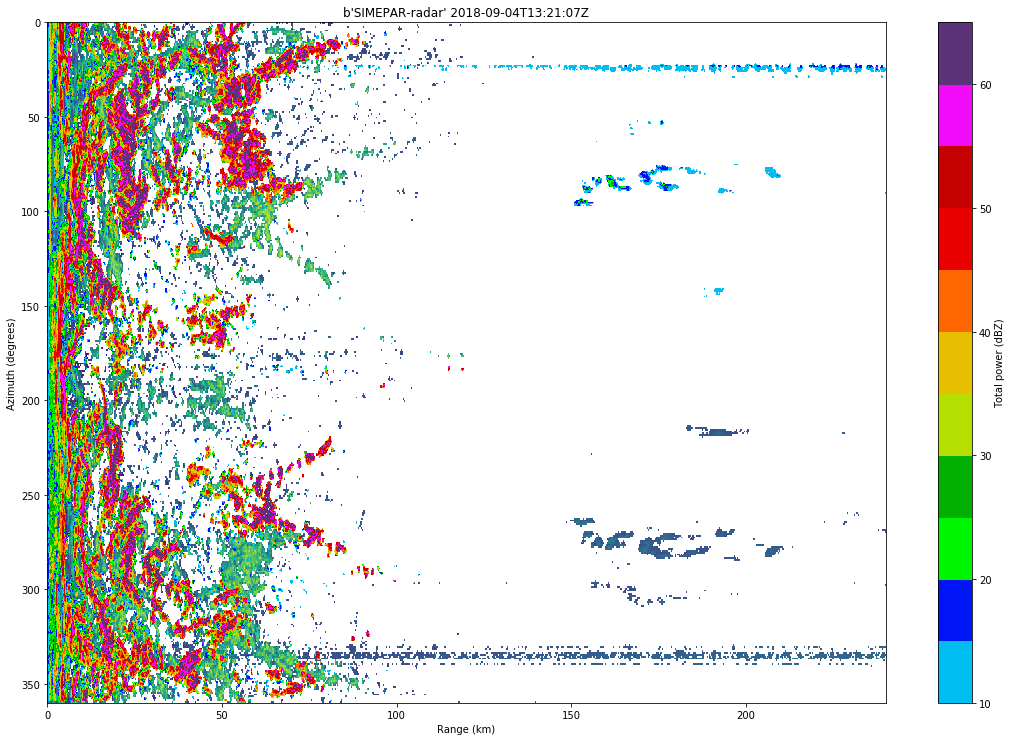

In [9]:
"""
    |||||   ||||||||||||||||| SIMEPAR
    |||||   ||||||||||||||||| Sistema Meteorológico do Paraná
    |||||               |||||
    |||||||||||||||||   ||||| Technology and Environmental Information
    (C) Copyleft Sistema Meteorológico Simepar (SIMEPAR)
        http://www.simepar.br

    Author: Paulo Alexandre da Silva Mello (paulo.mello.simepar@gmail.com)
    =============================
    RADAR TXS: Example of BSCAN
    =============================

"""
import pyart
import matplotlib.pyplot as plt
import glob
import numpy as np

filenames = ['TXS180904132107.RAWW7SJ']

#indexVar e indexElev utilizado para pegar a primeira variável do dicionário criado com todas as variáveis do Radar
# e a primeira elevação
indexVar =  0
indexElev = 0

## Forloop para plotar todos os filename descritos na lista.
for filename in filenames:
    radar = pyart.io.sigmet.read_sigmet(filename)
    radarOptsToPlot = {'vars': [key for key in radar.fields.keys()],
                       'elev': radar.sweep_number['data']}

    plt = plot_bscan_map(radarOptsToPlot['vars'][indexVar], radar,
    	                 sweep=0, cmap='pyart_NWSRef', 
    	                 vmin=10, vmax=60)
    plt.show()

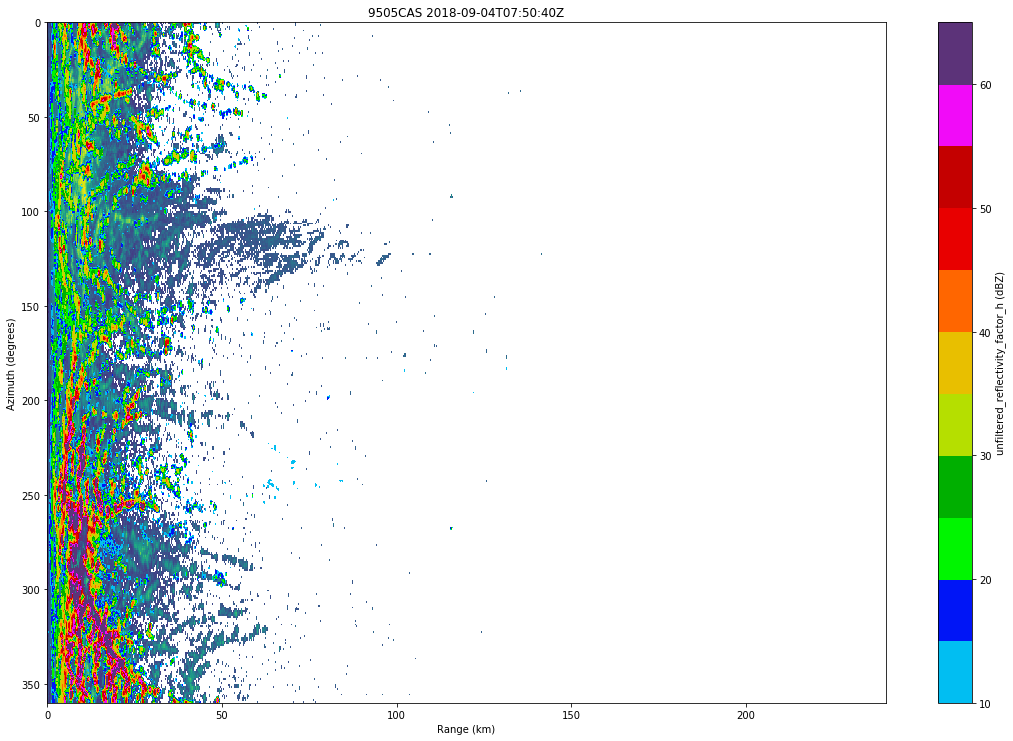

In [10]:
"""
    |||||   ||||||||||||||||| SIMEPAR
    |||||   ||||||||||||||||| Sistema Meteorológico do Paraná
    |||||               |||||
    |||||||||||||||||   ||||| Technology and Environmental Information
    (C) Copyleft Sistema Meteorológico Simepar (SIMEPAR)
        http://www.simepar.br

    Author: Paulo Alexandre da Silva Mello (paulo.mello.simepar@gmail.com)
    =============================
    RADAR CAS: Example of BSCAN
    =============================

"""
import pyart
import matplotlib.pyplot as plt
import glob
import numpy as np

filenames = ['9505CAS201809040750ae.nc']

#indexVar e indexElev utilizado para pegar a primeira variável do dicionário criado com todas as variáveis do Radar
# e a primeira elevação
indexVar =  0
indexElev = 0

## Forloop para plotar todos os filename descritos na lista.
for filename in filenames:
    radar = pyart.io.cfradial.read_cfradial(filename)
    radarOptsToPlot = {'vars': [key for key in radar.fields.keys()],
                       'elev': radar.sweep_number['data']}

    plt = plot_bscan_map(radarOptsToPlot['vars'][indexVar], radar,
                         sweep=0, cmap='pyart_NWSRef', 
                         vmin=10, vmax=60)
    plt.show()

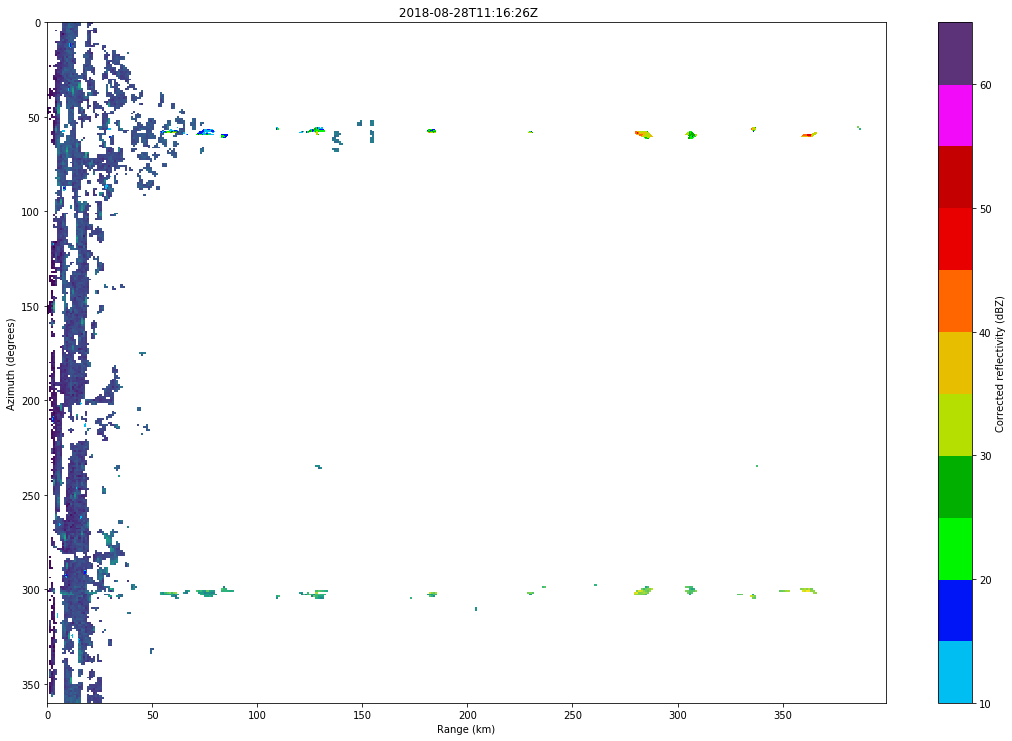

In [11]:
"""
    |||||   ||||||||||||||||| SIMEPAR
    |||||   ||||||||||||||||| Sistema Meteorológico do Paraná
    |||||               |||||
    |||||||||||||||||   ||||| Technology and Environmental Information
    (C) Copyleft Sistema Meteorológico Simepar (SIMEPAR)
        http://www.simepar.br

    Author: Paulo Alexandre da Silva Mello (paulo.mello.simepar@gmail.com)
    =============================
    RADAR ST1: Example of BSCAN
    =============================

"""
import pyart
import matplotlib.pyplot as plt
import glob
import numpy as np

filenames = ['STI-400--2018-08-28--11-16-27.mvol']

#indexVar e indexElev utilizado para pegar a primeira variável do dicionário criado com todas as variáveis do Radar
# e a primeira elevação
indexVar =  0
indexElev = 0

## Forloop para plotar todos os filename descritos na lista.
for filename in filenames:
    radar =  pyart.aux_io.gamic_hdf5.read_gamic(filename)
    radarOptsToPlot = {'vars': [key for key in radar.fields.keys()],
                       'elev': radar.sweep_number['data']}

    plt = plot_bscan_map(radarOptsToPlot['vars'][indexVar], radar,
    	                 sweep=0, cmap='pyart_NWSRef', 
    	                 vmin=10, vmax=60)
    plt.show()

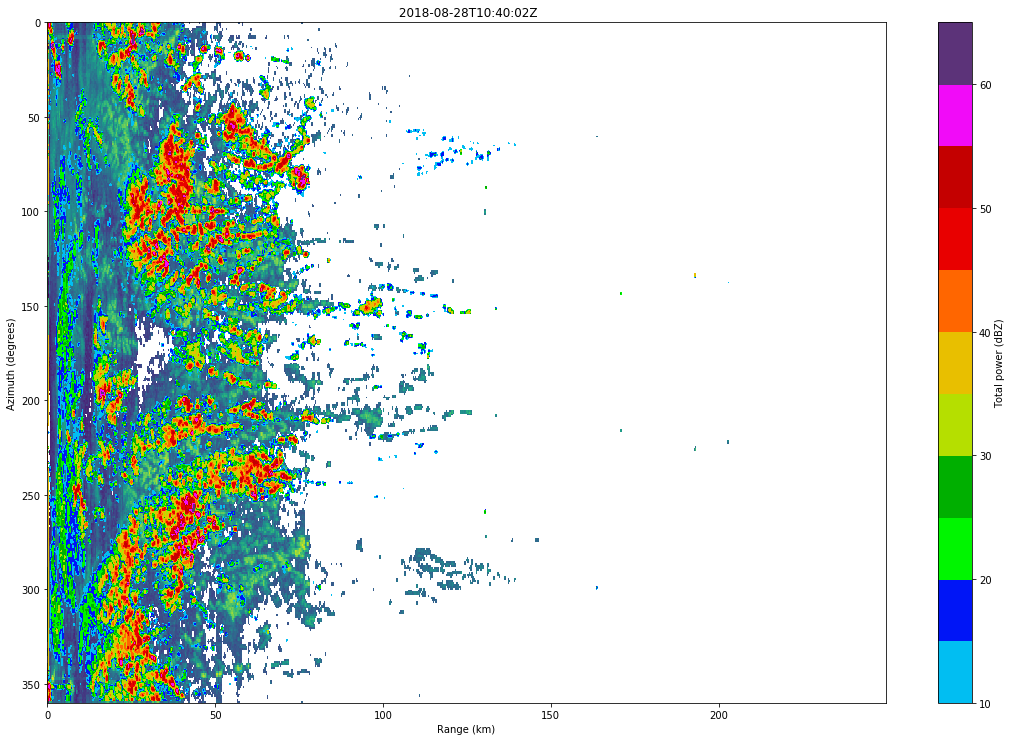

In [12]:
"""
    |||||   ||||||||||||||||| SIMEPAR
    |||||   ||||||||||||||||| Sistema Meteorológico do Paraná
    |||||               |||||
    |||||||||||||||||   ||||| Technology and Environmental Information
    (C) Copyleft Sistema Meteorológico Simepar (SIMEPAR)
        http://www.simepar.br

    Author: Paulo Alexandre da Silva Mello (paulo.mello.simepar@gmail.com)
    =============================
    ODIM FILES: Example of BSCAN
    =============================

"""
import pyart
import matplotlib.pyplot as plt
import glob
import numpy as np

filenames = ['TM1-250--2018-08-28--10-40-02dBuZ.vol.h5']

#indexVar e indexElev utilizado para pegar a primeira variável do dicionário criado com todas as variáveis do Radar
# e a primeira elevação
indexVar =  0
indexElev = 0

## Forloop para plotar todos os filename descritos na lista.
for filename in filenames:
    radar = pyart.aux_io.odim_h5.read_odim_h5(filename)
    radarOptsToPlot = {'vars': [key for key in radar.fields.keys()],
                       'elev': radar.sweep_number['data']}

    plt = plot_bscan_map(radarOptsToPlot['vars'][indexVar], radar,
    	                 sweep=0, cmap='pyart_NWSRef', 
    	                 vmin=10, vmax=60)
    plt.show()